In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [3]:
crimes1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',on_bad_lines='skip')
crimes2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')
crimes3 = pd.read_csv('Chicago_Crimes_2012_to_2023.csv',on_bad_lines='skip')
crimes = pd.concat([crimes1, crimes2, crimes3], ignore_index=False, axis=0)

C:\Users\sejal\AppData\Local\Temp\ipykernel_18836\1453495928.py:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',on_bad_lines='skip')
C:\Users\sejal\AppData\Local\Temp\ipykernel_18836\1453495928.py:2: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')


In [4]:
del crimes1
del crimes2
del crimes3

print('Dataset ready..')

print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)


Dataset ready..
Dataset Shape before drop_duplicate :  (11631694, 23)
Dataset Shape after drop_duplicate:  (7784688, 23)


In [5]:
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

In [6]:
# first 3 records
crimes.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,NaN,NaN,NaN,NaN
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1876757.0,41.817229,-87.637328
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,NaN,NaN,NaN,NaN


In [7]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)
# of records X # of features
crimes.shape


(7784688, 13)

In [8]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7784688 entries, 2004-01-01 00:01:00 to 2022-09-26 19:20:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          object        
 11  Latitude              object        
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 727.6+ MB


In [9]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R:-
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

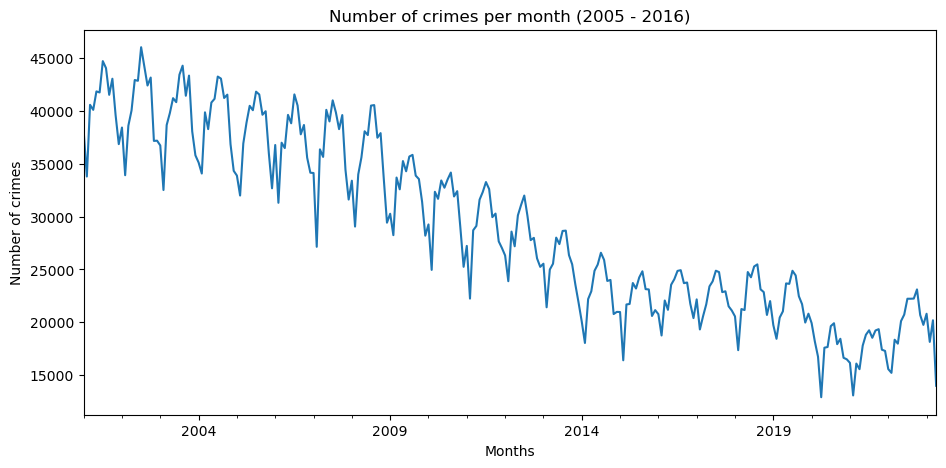

In [10]:
# Visualization 1
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

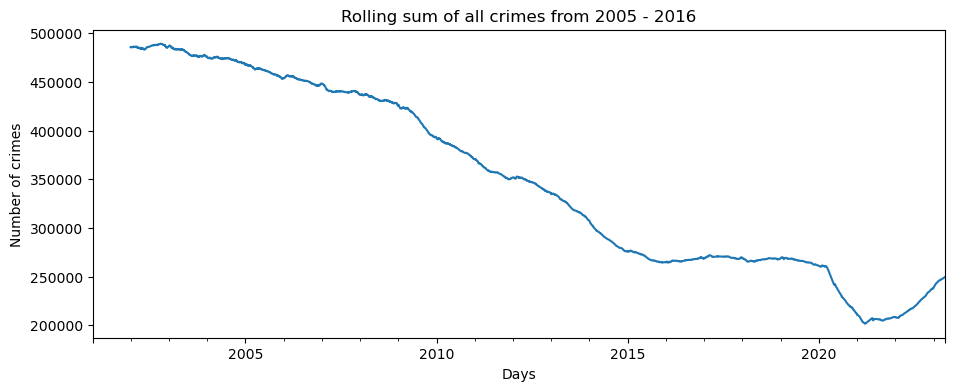

In [11]:
#Visualization 2
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2005 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()


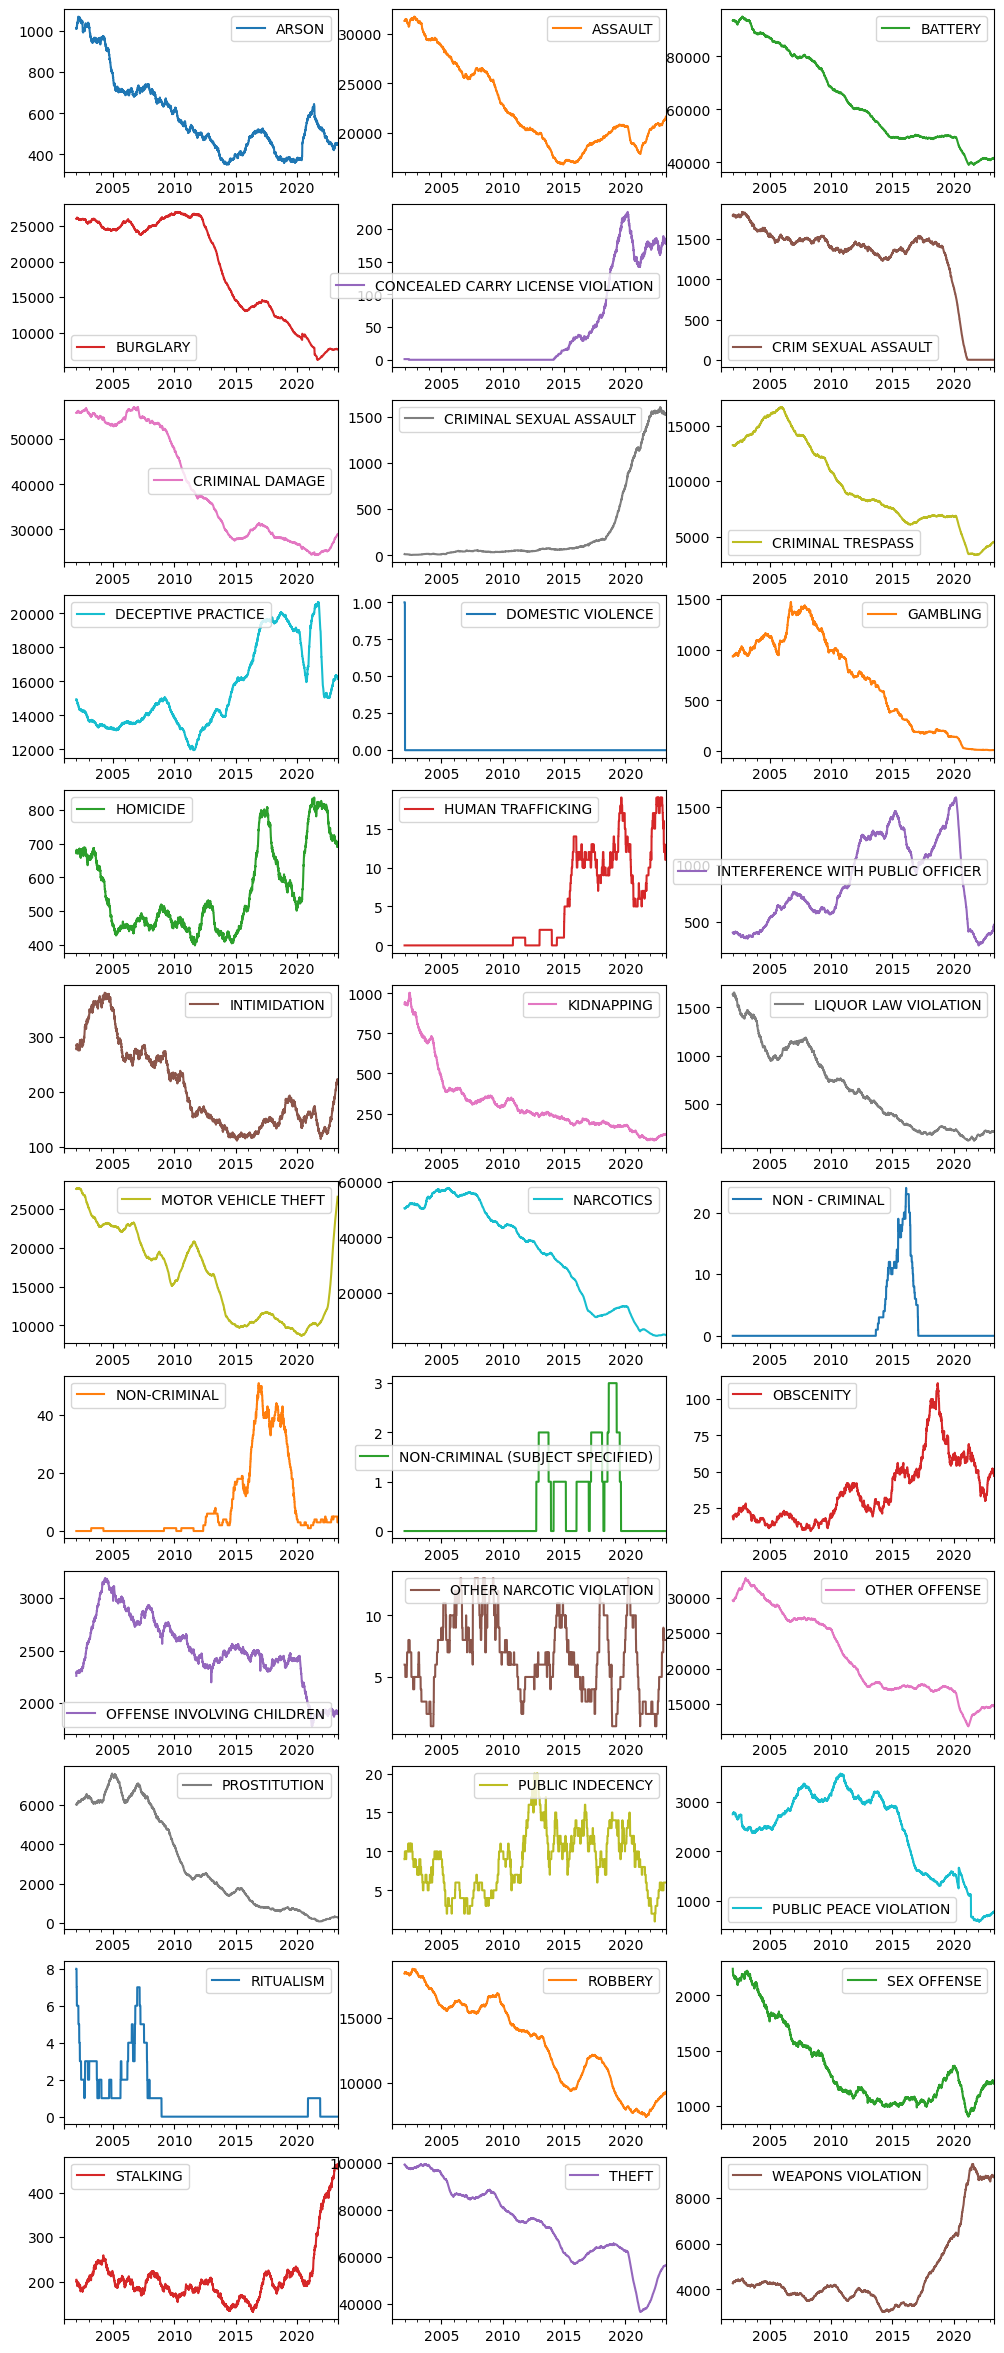

In [12]:
#Visualization 3
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)


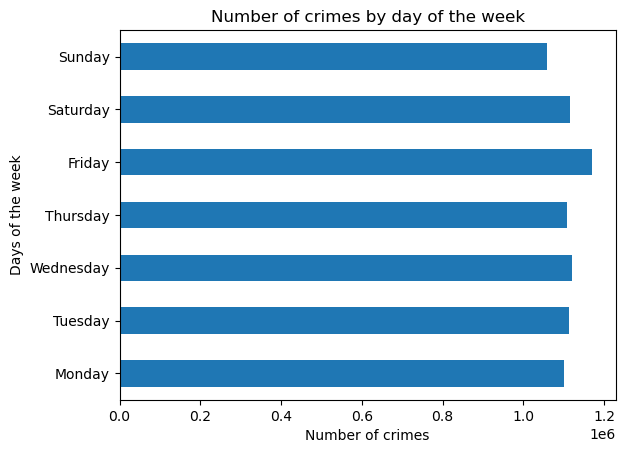

In [13]:
#Not all crimes are the same.
#Some crimes types are more likely to occur than other types depending on the place and time.
#In this section, we will see how crimes differ between different places at different times.
#Visualization 4
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

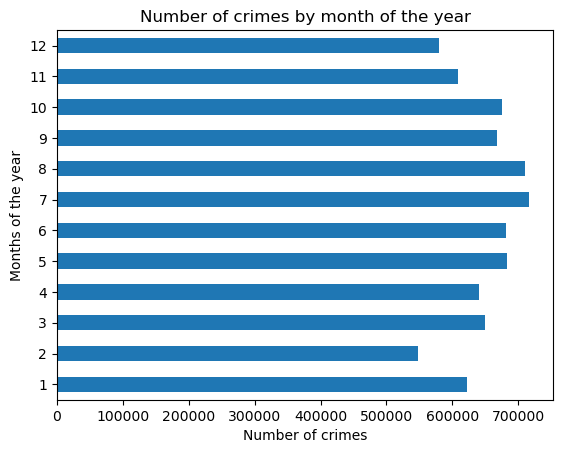

In [14]:
#Visualization 5
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

C:\Users\sejal\AppData\Local\Temp\ipykernel_18836\114524562.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')


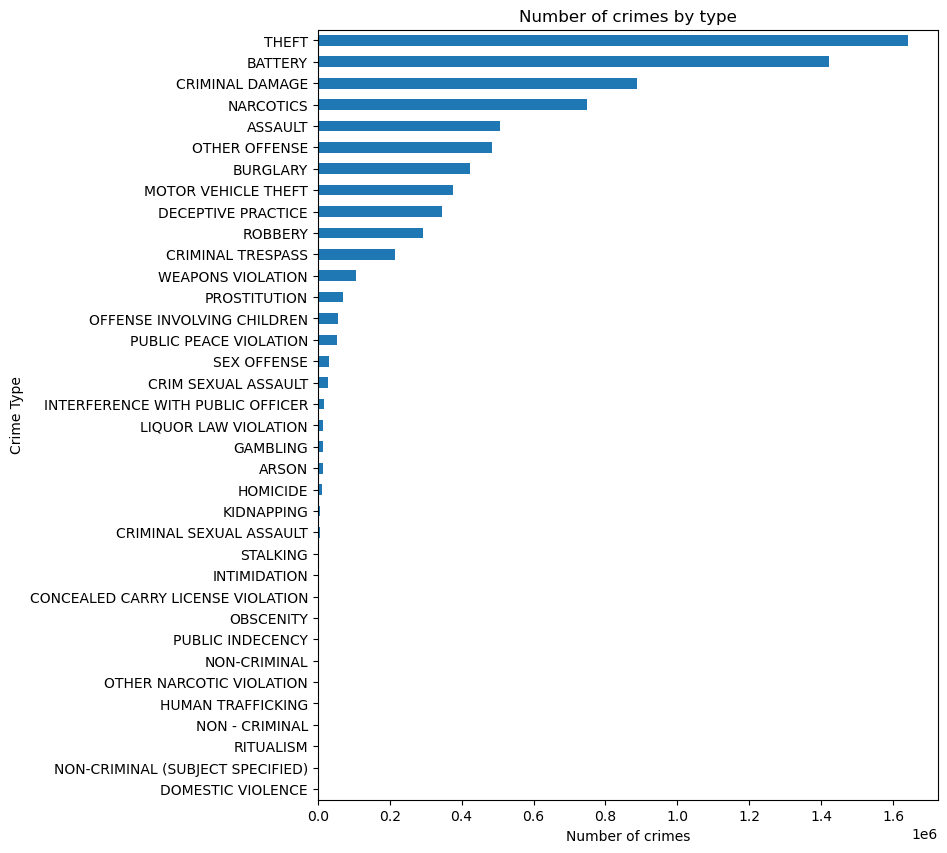

In [15]:
#Visualization 6
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\sejal\AppData\Local\Temp\ipykernel_18836\3169138998.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')


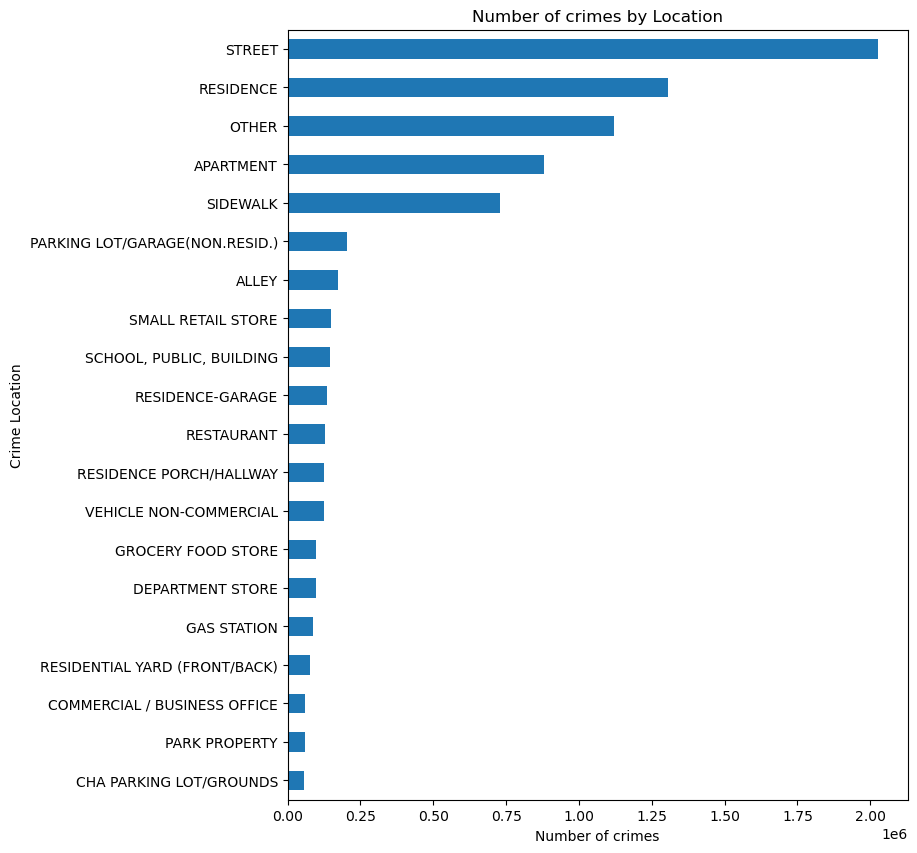

In [16]:
#Visualization 7
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()



In [17]:

hour_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = crimes.pivot_table(values='ID', index=crimes.index.hour, columns=crimes.index.day_name(), aggfunc=np.size).fillna(0)
hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days
dayofweek_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)


In [18]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.values), np.abs(np.min(df_marginal_scaled.values))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)

    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result    

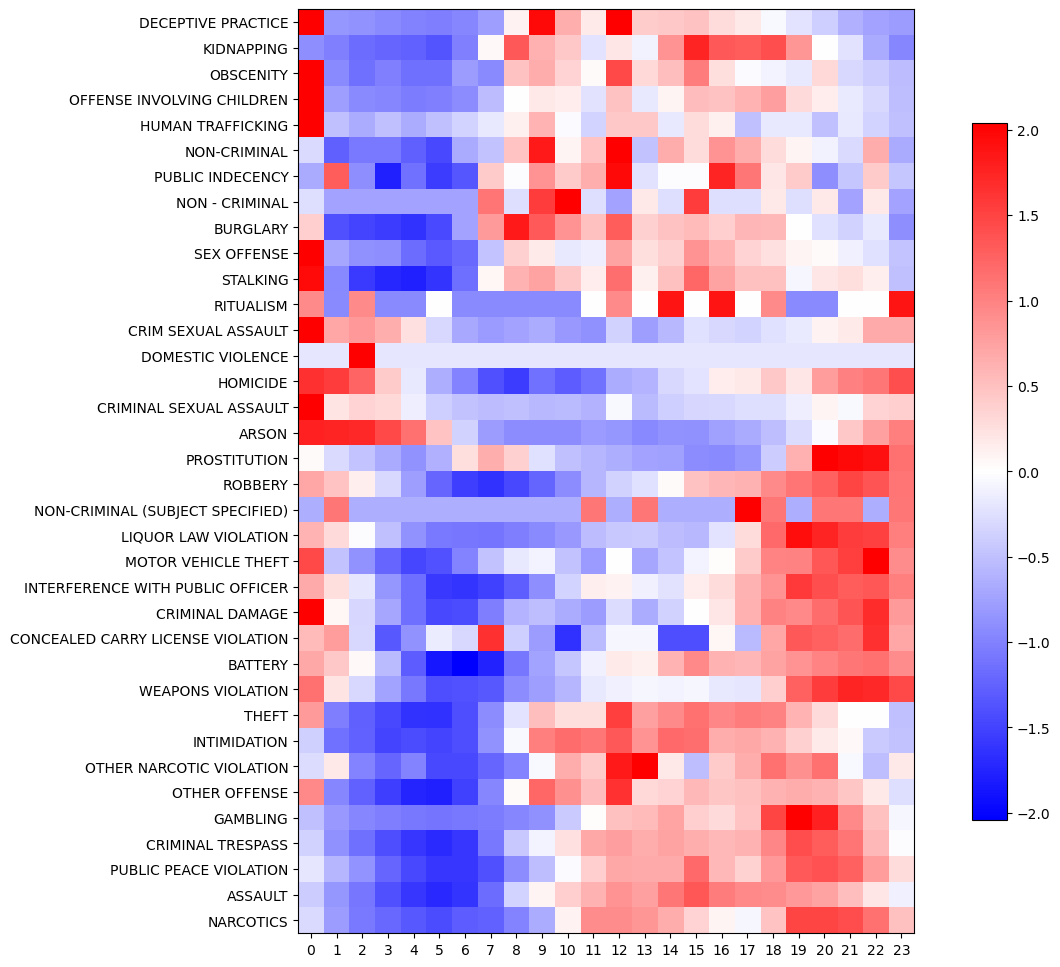

In [19]:
#HeatMap 1
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

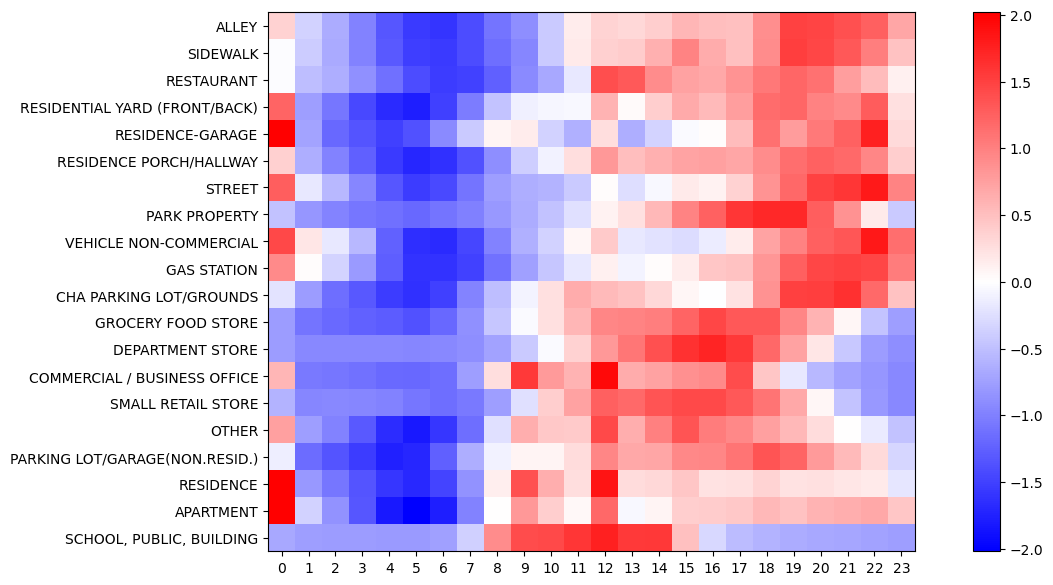

In [20]:
# Heatmap 2
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

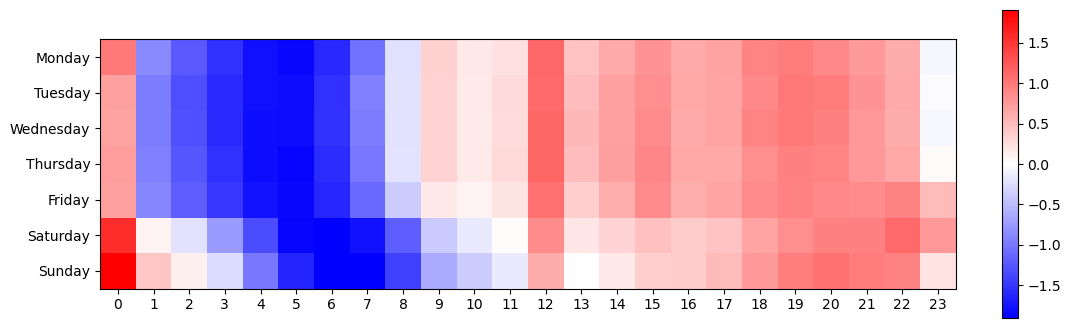

In [21]:
# Heatmap 3
plt.figure(figsize=(12,4))
scale_and_plot(hour_by_week, ix=np.arange(7))

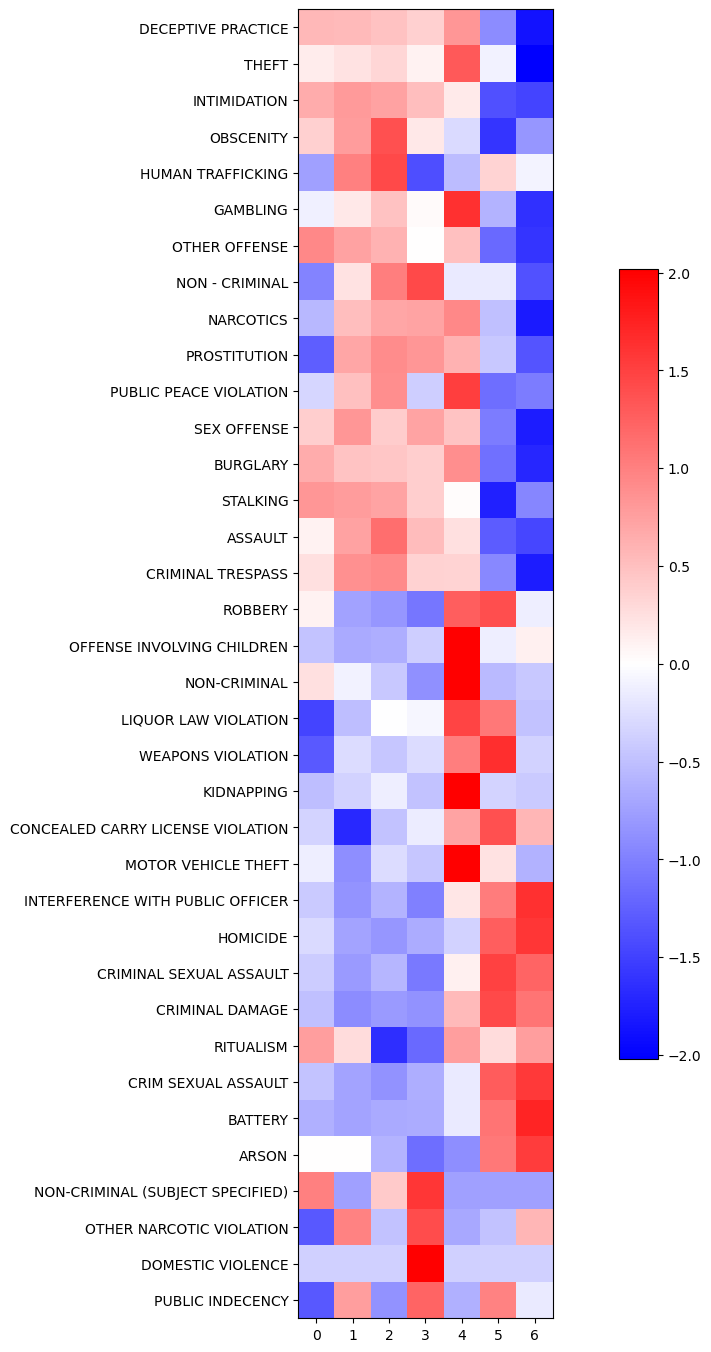

In [22]:
#Heatmap 4
plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type)

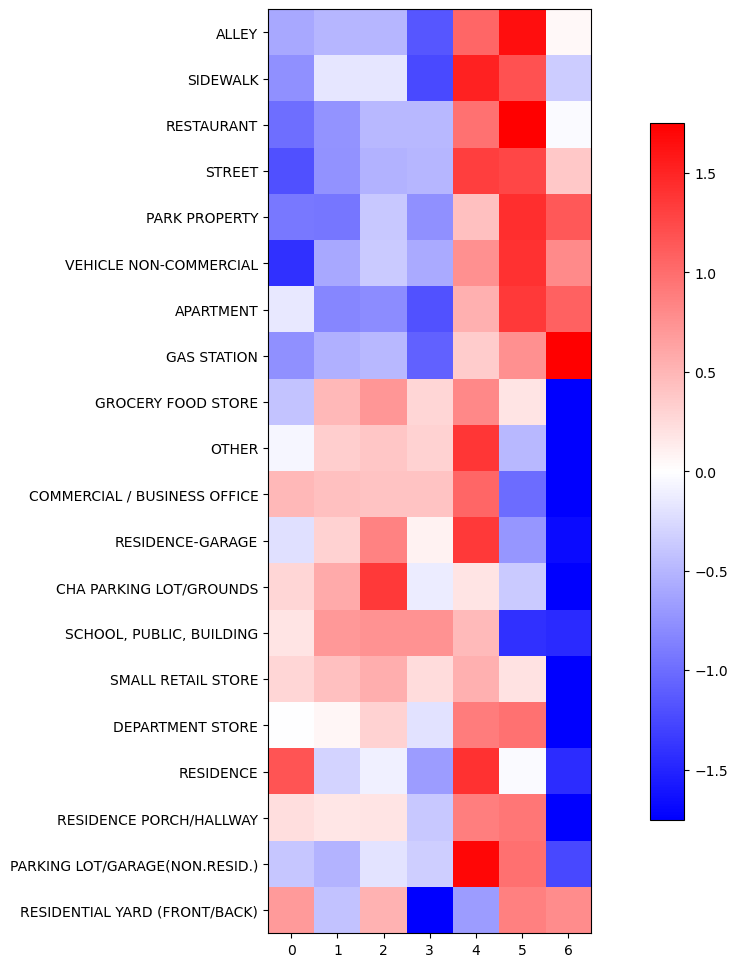

In [23]:
#Heatmap 5
plt.figure(figsize=(15,12))
scale_and_plot(dayofweek_by_location)

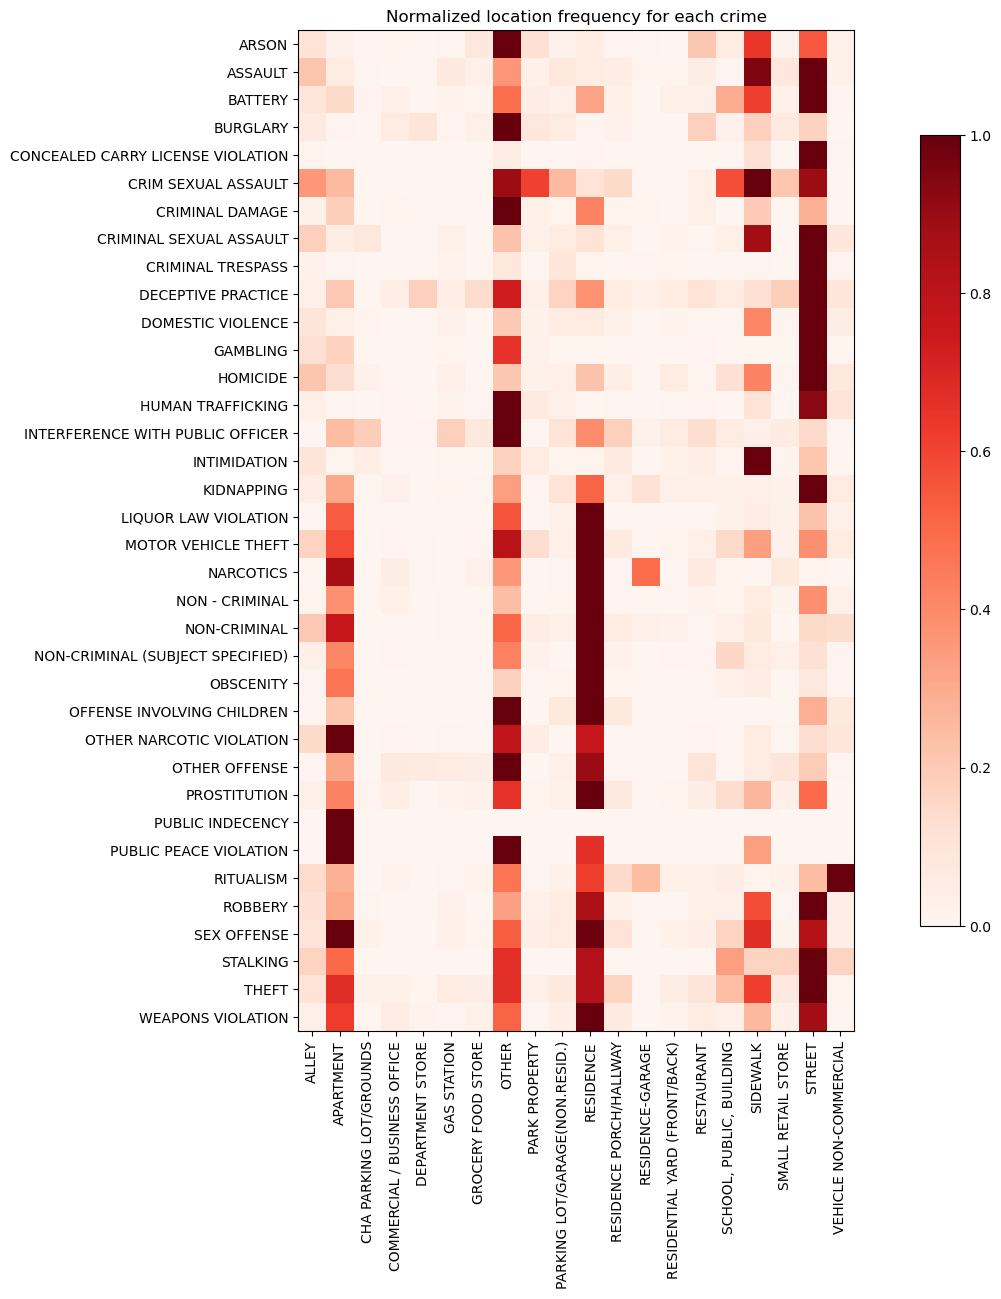

In [24]:
#Prediction of when certain crimes can happen
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

In [25]:
#Prediction of where certain crimes can happen
crimes.iloc[(crimes[['Longitude']].values < -88.0).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Longitude']].values > -87.5).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values < 41.60).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values > 42.05).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.replace({'Latitude': 0.0, 'Longitude': 0.0}, np.nan, inplace=True)
crimes.dropna(inplace=True)

TypeError: '<' not supported between instances of 'str' and 'float'